In [1]:
import numpy as np
import pandas as pd

In [2]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([1, 2, 3, 4, 100])

In [3]:
ser1.mean()

3.0

In [4]:
ser2.mean()

22.0

In [5]:
ser1.median()

3.0

In [6]:
ser2.median()

3.0

### bit.ly/SeSAC_Py

In [20]:
import os
os.getcwd() # 현재 작업 폴더

'C:\\Users\\user\\Desktop\\Python Class'

In [21]:
os.listdir() # 현재 폴더에 data_diamonds.csv 있는지 확인

['.ipynb_checkpoints',
 'class_240108.ipynb',
 'class_240110.ipynb',
 'class_240111.ipynb',
 'class_240111.zip',
 'class_240115.ipynb',
 'data_and_scripts_week1.zip',
 'data_diabetes.csv',
 'data_diamonds.csv',
 'data_elec_load.csv',
 'data_excel_01_sheet3.xlsx',
 'data_excel_02_sheet3_diff.xlsx',
 'data_excel_03_sheet3_diff.xlsx',
 'excel_sheet_styling_and_plotting_via_openpyxl.ipynb',
 'write_01.xlsx',
 'write_02.xlsx',
 'write_03.xlsx',
 'write_excel_01_basic.xlsx',
 'write_excel_02_diff_sheet.xlsx',
 'write_excel_03_diff_location.xlsx',
 'write_excel_04_remove_index.xlsx',
 'write_excel_05_multiple_sheet.xlsx',
 'write_excel_06_styling_and_plot.xlsx']

In [10]:
df_dia = pd.read_csv("data_diamonds.csv")
df_dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [ ]:
df_dia.dtypes

In [12]:
df_dia_num = df_dia.select_dtypes(include = "number")
df_dia_num.head(2)

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31

In [ ]:
df_dia_num.mean()

In [ ]:
df_dia_num.mean().reset_index()

In [ ]:
df_dia_num.mean(axis = 1)

In [ ]:
df_dia_num["mean"] = df_dia_num.mean(axis = 1)
df_dia_num.head()

In [ ]:
df_dia_num["mean2"] = df_dia_num.apply(lambda x: x.mean(), axis = 1)
df_dia_num.head(2)

In [18]:
def mean_r2(x):
    return round(x.mean(), 2)

In [19]:
df_dia_num["mean3"] = df_dia_num.apply(mean_r2, axis = 1)
df_dia_num.head(2)

carat  depth  table  price     x     y     z       mean      mean2  mean3
0   0.23   61.5   55.0    326  3.95  3.98  2.43  64.727143  64.727143  64.73
1   0.21   59.8   61.0    326  3.89  3.84  2.31  65.292857  65.292857  65.29

In [ ]:
# df_dia_num = df_dia.select_dtypes(include = "number")
# df_dia_num.head(2)

In [ ]:
df_dia_num.agg("max")

In [ ]:
df_dia_num.agg(["min", "max", "mean", "median"])

In [ ]:
df_dia.groupby("cut")["price"].mean() # 세공수준별 가격 평균

In [ ]:
df_dia.groupby("cut")[["price", "carat"]].mean() # 세공수준별 가격과 캐럿의 평균

In [ ]:
df_dia.groupby("cut")[["price", "carat"]].agg(["min", "max"])

In [ ]:
df_dia.groupby("cut")[["price", "carat"]].agg({"price": "min", "carat": "max"})

In [32]:
df_dia["price"].quantile(0.75) # 3Q(제 3 사분위수)

5324.25

In [33]:
df_dia["price"].quantile(0.25) # 1Q(제 1 사분위수)

950.0

In [34]:
val_3q = df_dia["price"].quantile(0.75) # 3Q(제 3 사분위수)
val_1q = df_dia["price"].quantile(0.25) # 1Q(제 1 사분위수)
val_3q - val_1q # IQR(Inter Quantile Range) 사분위 범위

4374.25

In [35]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([1, 2, 3, 4, 100])

In [36]:
ser1.std() # Pandas는 기본적으로 자유도(degree of freedom)을 1로 계산

1.5811388300841898

In [37]:
np.std(ser1) # NumPy는 자유도 0을 기준으로 계산

1.4142135623730951

In [38]:
df_dia["price"].std()

3989.4397381463023

In [39]:
np.std(df_dia["price"])

3989.402757628797

In [40]:
df_dia["price"].std() / df_dia["price"].mean() * 100 # 변동계수

101.44019579531273

https://datadoctorblog.com/2023/08/18/Py-Stat-Descriptive-Statistics-shape/

In [42]:
df_dia["price"].skew() # 왜도(skewness)

1.618395283383529

In [43]:
df_dia["price"].kurt() # 첨도(kurtosis)

2.17769575924869

<Axes: >

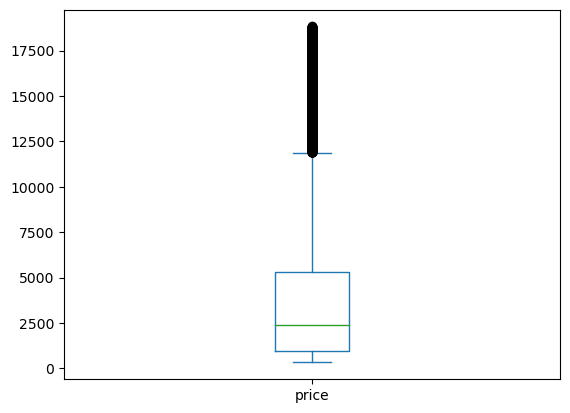

In [46]:
df_dia["price"].plot.box()

<Axes: ylabel='Density'>

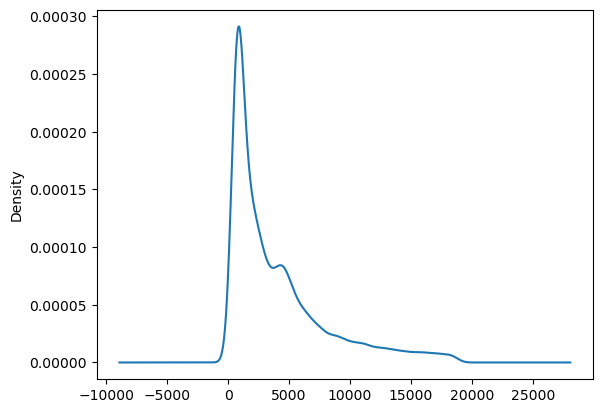

In [44]:
df_dia["price"].plot.density()

In [47]:
(1 + 0.01) ** 200

7.316017851829954

In [48]:
df_dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [49]:
ser_na1 = pd.Series([1, 2, np.nan, 4, 8])
ser_na2 = pd.Series([1, 2, np.nan, 100, np.nan, 300])

In [52]:
df_na1 = pd.DataFrame(dict(v = ser_na1))
df_na1["f1"] = df_na1["v"].fillna(-1)
df_na1["f2"] = df_na1["v"].fillna(df_na1["v"].mean())
df_na1["f3"] = df_na1["v"].fillna(df_na1["v"].median())

In [55]:
df_na2 = pd.DataFrame(dict(v = ser_na2))
df_na2["f1"] = df_na2["v"].fillna(0)

In [63]:
df_na2["v"].isna().sum()

2

In [65]:
df_na2.isna().sum() # 데이터프레임의 전체 행의 결측치 개수를 한 번에 확인

v     2
f1    0
dtype: int64

In [ ]:
df_na2.dropna()

In [67]:
df_na2_sub = df_na2.dropna()
len(df_na2_sub)

4

In [ ]:
df_na2_sub = df_na2_sub.reset_index(drop = True)
df_na2_sub

In [70]:
df_na2["f2"] = df_na2["v"].interpolate() # 보간법. 기본적으로 선형 보간 실시
df_na2

v     f1     f2
0    1.0    1.0    1.0
1    2.0    2.0    2.0
2    NaN    0.0   51.0
3  100.0  100.0  100.0
4    NaN    0.0  200.0
5  300.0  300.0  300.0

### bit.ly/SeSAC_Py - data_week2.zip 파일 다운로드 받기

In [ ]:
df_o = pd.read_csv("prod_order.csv")
df_o.head()

In [77]:
df_o["order_dt"] = pd.to_datetime(df_o["order_dt"])
df_o["date"] = df_o["order_dt"].dt.date

In [ ]:
df_o_g = df_o.groupby("date")["qty"].sum().reset_index()
df_o_g.head(2)

In [ ]:
df_o_g["qty"].agg(["max", "min", "std", "var"]).reset_index()

In [87]:
df_o["date"].min(), df_o["date"].max()

(datetime.date(2022, 6, 10), datetime.date(2023, 12, 26))

In [94]:
df_date = pd.DataFrame(dict(date = pd.date_range(start = "2022-06-10",
                                                 end = "2023-12-26",
                                                 freq = "D")))
df_date.shape

(565, 1)

In [99]:
df_o_g["date"] = pd.to_datetime(df_o_g["date"])
df_join = pd.merge(df_date, df_o_g, on = "date", how = "left")
df_join["qty"] = df_join["qty"].fillna(0)
df_join.head(20)

date  qty
0  2022-06-10  5.0
1  2022-06-11  2.0
2  2022-06-12  8.0
3  2022-06-13  9.0
4  2022-06-14  4.0
5  2022-06-15  2.0
6  2022-06-16  3.0
7  2022-06-17  0.0
8  2022-06-18  0.0
9  2022-06-19  2.0
10 2022-06-20  0.0
11 2022-06-21  1.0
12 2022-06-22  0.0
13 2022-06-23  2.0
14 2022-06-24  0.0
15 2022-06-25  0.0
16 2022-06-26  1.0
17 2022-06-27  0.0
18 2022-06-28  1.0
19 2022-06-29  3.0